# Deep learning


Driven by practicality as we are for the purpose of this course, we will dwelve directly into an example of using DL. We will gradually learn more things as we do things.

Most developed deep learning APIs:
- Tensorflow
    - [Keras](https://keras.io/)
- PyTorch

### NN essentials

- task: classification, handwritten
- method: multi-layered perceptron
- concepts: NN architecture and training loop
- python libraries: native, keras, tensorflow, pytorch
- task: text classification

In [22]:
import tensorflow as tf

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [4]:
# reshape (flatten) and scale images
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

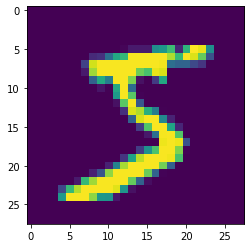

Label: 5


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
image=train_images[0].reshape(28, 28)
plt.imshow(image)
plt.show()
print("Label:", train_labels[0])

In [6]:
# convert labels to one hot encoding
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Multi-layered perceptron (feed forward network)

- Each hiden layer is formed by neurons called perceptrons
- A perceptron is a binary linear classifier
    - inputs: a flat array $x_i$
    - one output per neuron j: $y_j$
    - a transformation of input into output (activation function):
        - linear separator
        - sigmoid function

$z_j= \sum_i {w_{ij} x_i} + b_j$

$y_j = f(z_j) = \frac{1}{1 + e^{-z_j}}$


In [8]:
from IPython.display import Image
Image(url= "../img/perceptron.png", width=400, height=400)

- input layer: sequential (flattened) image
- hidden layers: perceptrons
- output layer: softmax

In [9]:
from IPython.display import Image
Image(url= "../img/ffn.png", width=400, height=400)

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

# defining the NN structure
network = models.Sequential()
network.add(layers.Dense(512, activation='sigmoid', input_shape=(28 * 28,)))
network.add(layers.Dense(512, activation='sigmoid', input_shape=(512,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [11]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### Learning process

NNs are supervised learning structures!
- forward propagation: all training data is fed to the network and y is predicted
- estimate the loss: difference between prediction and label
- backpropagation: the loss information is propagated backwards layer by layer, and the neuron weights are adjusted
- global optimization: the parameters (weights and biases) must be adjusted in such a way that the loss function presented above is minimized.

In [12]:
from IPython.display import Image
Image(url= "../img/NN_learning.png", width=400, height=400)

- Gradient descent (main optimization technique)
The weights in small increments with the help of the calculation of the derivative (or gradient) of the loss function, which allows us to see in which direction “to descend” towards the global minimum. Most optimizers are based on gradient descent, an algorithm that is very eficient on GPUs today, but gives local optima.
- Epochs and batches. The optimization is done in general in batches of data in the successive iterations (epochs) of all the dataset that we pass to the network in each iteration. "epochs" are complete runs through the dataset. Batches are used because the whole dataset is hard to be passed through the network at once.

```
- 469 number of batches
128 * 469 ~= 60000 images (number of samples)
```

In [13]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 2.3260 - accuracy: 0.1102
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 2.0545 - accuracy: 0.2552
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 1.5536 - accuracy: 0.4409
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 1.2167 - accuracy: 0.5548
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 1.0346 - accuracy: 0.6229


In [14]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(test_loss, test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.9686 - accuracy: 0.6306
0.9685710668563843 0.6305999755859375


Observations:
- slightly smaller accuracy on the test data compared to training data (model overfits on the training data)

Questions:
- Why do we need several epochs?
- What is the main computer limitation when it comes to batches?
- How many epochs are needed, and what is the danger associated with using too many or too few?

Reading:
- https://medium.com/onfido-tech/machine-learning-101-be2e0a86c96a


### Run a prediction:

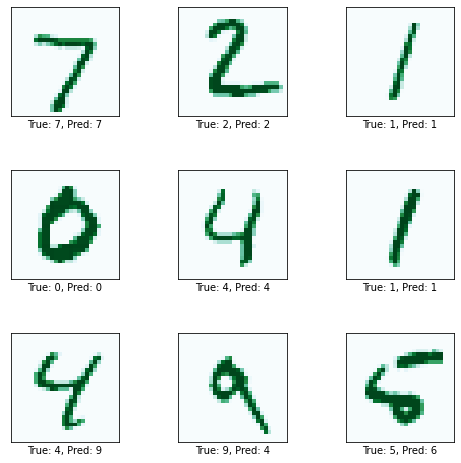

In [15]:
import matplotlib.pyplot as plt
import numpy as np

prediction=network.predict(test_images[0:9])
y_true_cls = np.argmax(test_labels[0:9], axis=1)
y_pred_cls = np.argmax(prediction, axis=1)

fig, axes = plt.subplots(3, 3, figsize=(8,8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
  ax.imshow(test_images[i].reshape(28,28), cmap = 'BuGn')
  xlabel = "True: {0}, Pred: {1}".format(y_true_cls[i], y_pred_cls[i]) 
  ax.set_xlabel(xlabel)
  ax.set_xticks([])
  ax.set_yticks([])

plt.show()

### Historical essentials

How is the animal brain capable of deciding a type from a sequence of sensory inputs? What defines a dog in the image of a dog? What in the wording will make you say this is a happy person who pretends being sad? How many pictures of a dog must a child see in order to correctly label a dog? Deep learning, from an algorithmic perspective, is the application of advanced multi-layered filters to learn hidden features in data representation. Many of the methods that are used today in DL, such as most neural network types (and not only), went through a 20 years long pause due to the fact that the computing machines avalable at the era were too slow to produce wanted results. It was several things that precipitated their return in 2010:
- Graphical processors. A GPU has thousands of cores that are specialized in concomitant linear operations. This provided the infrastructure on which "deep" algorithms perform the best.
- The maturity of cloud computing. This enables third parties to use DL methodologies at scale, and with small operating costs.
- Big data. Most AI needs models to be trained on a lot of data, thus AI needs a sufficient level of data availability. The massive acumulation of data (not only in biology) is a very recent phenomenon.

As with everything else in this course, DL is a science in itself, and contains thousands pages of theory. For an in-depth reading we recommend this book, written by some of the early specialists in neural network: http://www.deeplearningbook.org/. It is today possibly the top bestseller in the field of machine learning (also, it is free).

Python was an early favorite for DL, and initial libraries such as Theano started an approach based on defining the problem via Python, then compiling a program that can be executed faster than a regular code on either CPU and GPU. Later in 2013 Google made Tensorflow available as open source library and different other DL libraries have mushroomed. The difficulty of operating such libraries comes from their specialist language and the Pythonic way to solve this and open AI to everyone was to make a library that would be able to use various DL engines, while simplifying the API.

### Text classification

The purpose is to cathegorize films into good or bad based on their reviews. Data is vectorized into binary.

**layer activation**

What happens during layer activation? Basically a set of tensor operations are being performed. A simplistic way to understand this is operations done on array of matrices, while the atomic operation would be:

```
output = relu(dot(W, input) + b)
```
, where the weight matrix W shape is (input_dim (10000), 16) and b is a bias term. In linear algebra terms, this will project the input data onto a 16 dimensional space. The more dimensions, the more features, the more confusion, and more computing cost BUT also more complex representations.

Task:
- Perform sentiment analysis using the code below!
- Plot the accuracy vs loss in both the training and validation data, on the history.history dictionary. Use more epochs. What do you notice? How many epochs do you think you need? What if you monitor for 100000 epochs?
- We were using 2 hidden layers. Try to use 1 or 3 hidden layers and see how it affects validation and test accuracy.
- Adjust the learning rate.
- Try to use layers with more hidden units or less hidden units: 32 units, 64 units...
- Try to use the mse loss function instead of binary_crossentropy.
- Try to use the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(max([max(sequence) for sequence in train_data]))

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))

p = model.predict(x_test)
print(history.history)

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

model = Sequential()
model.add(Embedding(max_features, batch_size))
model.add(SimpleRNN(batch_size, return_sequences=True))
model.add(SimpleRNN(batch_size))  # This last layer only returns the last outputs.
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Task:
- Figure out how to use LSTMs to improve the model accuracy. Also figure out what LSTMs are :) 

# Common NN headaches


**Overfitting:** Gradient descent is the core of NN fitting. Optimization adjusts a model optimally on the training data, while the overfitting quantifies how bad the trained model would perform on data it has never seen before. The tension between fitness and generalization is what defines machine learning.

While the model is trained, it starts with being under-fit, but after more features are identified and more cleaning is done, the model starts to become over-fit and vallidation metrics reach a "stable state" or start degrading. The patterns that the model not learn are specific to the training data, but not to the test data. How do we combat this?

- Add more data. The most succesfull AI today is trained on an umbelievably large set of labeled data. Somewhere deep underground, billions of minions work all day in their smart homes, driving smart cars, being smart about labeling their photos on FB. Similarly their machines tag single cell IDs on RNA probes.
- Regularization. And yet the data is always not sufficient... Regularisation involves either modulating the quantity of information that your model is allowed to store, or to adding constraints on what information it is allowed to store.
- Hyperparametrization: DL models typically parametrize the model, which means that the fit is different when a different combination of parameters is used

Tasks:
- Reduce network size in one of the previous NNs, and then increase it a lot. Plot this for a number of epochs and see when does overfitting occur.
